In [43]:
import hw2q2
import numpy as np
import matplotlib.pyplot as plt 

In [44]:
def mlParamEstimate(Xc,yc):
    # (xT * X)^-1 * xT * y
    return (np.linalg.inv(Xc.T.dot(Xc)).dot(Xc.T)).dot(yc)

def mapParamEstimate(Xc,yc,gamma):
    # (xT * X + gamma * I)^-1 * xT * y
    return (np.linalg.inv(Xc.T.dot(Xc) + 1/gamma*np.identity(Xc.shape[1])).dot(Xc.T)).dot(yc)

def meanSquaredError(w, x, y):
    N = len(y)
    x_tilde = np.array([np.ones(x.shape[0]),x[:,0], x[:,1],x[:,0]**2,x[:,1]**2,x[:,0]**3, x[:,1]**3,\
        x[:,0]*x[:,1],x[:,0]**2*x[:,1],x[:,0]*x[:,1]**2]).T
    # x_tilde = np.array([np.ones(x.shape[0]),x[:,0], x[:,1],x[:,0]**2,x[:,1]**2,x[:,0]**3, x[:,1]**3]).T
    error = (y-x_tilde.dot(w))**2
    mse = np.sum(error)/N
    return mse

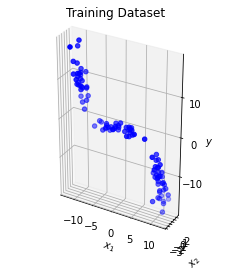

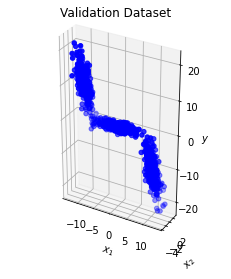

In [45]:
# train = 100 samples, test = 1000 samples
x_train, y_train, x_test, y_test = hw2q2.hw2q2()

In [46]:
# -------------------------------------------------
# MLE
# -------------------------------------------------
#x_tilde = np.array([x_train[:,0]**3, x_train[:,1]**3,x_train[:,0]**2,x_train[:,1]**2,x_train[:,0], x_train[:,1],np.ones(x_train.shape[0])]).T
x_tilde = np.array([np.ones(x_train.shape[0]),x_train[:,0], x_train[:,1],x_train[:,0]**2,x_train[:,1]**2,x_train[:,0]**3, x_train[:,1]**3,\
    x_train[:,0]*x_train[:,1],x_train[:,0]**2*x_train[:,1],x_train[:,0]*x_train[:,1]**2]).T
w_mle = mlParamEstimate(x_tilde,y_train) # Get MAximum Likelihood Parameter Estimate
mse_mle = meanSquaredError(w_mle, x_test, y_test) # Get mean squared error
print("Mean Squared Error - ML Estimator: ",mse_mle)

# -------------------------------------------------
# MAP
# -------------------------------------------------
gammas = [i for i in np.geomspace(10**-4,10**4,17)]
w_maps = np.array([mapParamEstimate(x_tilde,y_train,gamma) for gamma in gammas])
mse_map = np.array([meanSquaredError(w_map, x_test, y_test) for w_map in w_maps])
print("Mean Squared Error - MAP Estimator:\n",mse_map)
print("Gamma Values:\n",gammas)


Mean Squared Error - ML Estimator:  5.293562452174171
Mean Squared Error - MAP Estimator:
 [4.85877563 4.99335098 5.07132787 5.11768177 5.17429183 5.2305683
 5.26673642 5.28385161 5.29033607 5.29252533 5.29323276 5.29345802
 5.29352941 5.293552   5.29355915 5.29356141 5.29356212]
Gamma Values:
 [0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0, 3162.2776601683795, 10000.0]


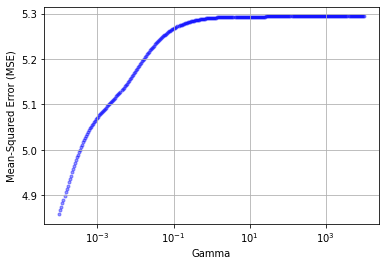

In [47]:
gammas1 = [i for i in np.geomspace(10**-4,10**4,300)]
w_maps1 = np.array([mapParamEstimate(x_tilde,y_train,gamma) for gamma in gammas1])
mse_map1 = np.array([meanSquaredError(w_map, x_test, y_test) for w_map in w_maps1])

fig, axes = plt.subplots()
axes.scatter(gammas1, mse_map1, color='b', marker='.', alpha=0.4)
# axes.plot(x0_space,cubic_mle_0, c='b', label="b_size=")
axes.set_xscale('log')
plt.grid()
#plt.title("MSE")
plt.xlabel("Gamma")
plt.ylabel("Mean-Squared Error (MSE)")
plt.show()

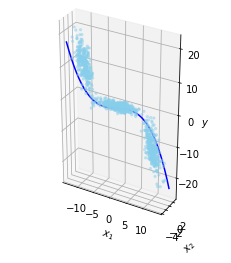

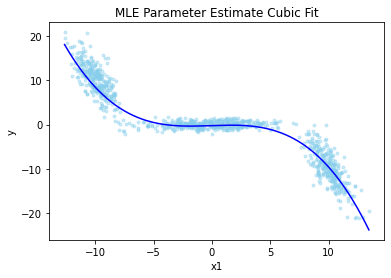

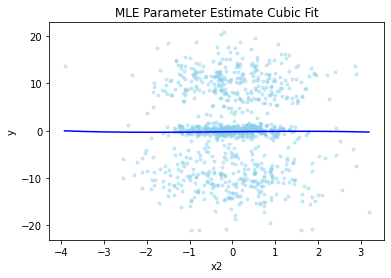

In [48]:
# --------------------------------
fig = plt.figure()
a = x_test[:,0]
b = x_test[:,1]
c = y_test

ax = fig.add_subplot(111, projection='3d')
ax.scatter(a, b, c, marker='.', color='skyblue', alpha=0.4)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel(r"$y$")
# plt.title("{} Dataset".format(name))
# To set the axes equal for a 3D plot
ax.set_box_aspect((np.ptp(a), np.ptp(b), np.ptp(c)))

x0_space = np.linspace(min(x_test[:,0]), max(x_test[:,0]), num=1000)
x1_space = np.linspace(min(x_test[:,1]), max(x_test[:,1]), num=1000)
w = np.transpose(w_mle)
fx = []
cubic_mle_0 = w_mle[0]+w_mle[1]*x0_space+w_mle[3]*x0_space**2+w_mle[5]*x0_space**3
cubic_mle_1 = w_mle[0]+w_mle[1]*x1_space+w_mle[3]*x1_space**2+w_mle[5]*x1_space**3
ax.plot(xs=x0_space, ys=x1_space, zs=cubic_mle_0, c='b', label="b_size=")
# plt.show()


# Add lines to plots
fig0, axes0 = plt.subplots()
axes0.scatter(x_test[:,0], y_test, color='skyblue', marker='.', alpha=0.4)
axes0.plot(x0_space,cubic_mle_0, c='b', label="b_size=")
plt.title("MLE Parameter Estimate Cubic Fit")
plt.xlabel("x1")
plt.ylabel("y")
plt.show()
# Add lines to plots
fig1, axes1 = plt.subplots()
axes1.scatter(x_test[:,1], y_test, color='skyblue', marker='.', alpha=0.4)
axes1.plot(x1_space,cubic_mle_1, c='b', label="b_size=")
plt.title("MLE Parameter Estimate Cubic Fit")
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

Text(0, 0.5, 'y')

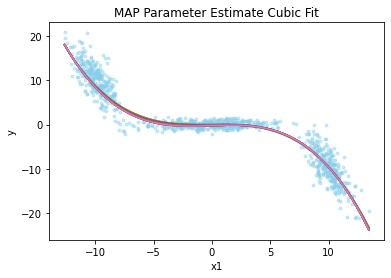

In [49]:
# Plot MAP estimators
x0_space = np.linspace(min(x_test[:,0]), max(x_test[:,0]), num=1000)
x1_space = np.linspace(min(x_test[:,1]), max(x_test[:,1]), num=1000)
w = np.transpose(w_mle)
fx = []
fig0, axes0 = plt.subplots()
axes0.scatter(x_test[:,0], y_test, color='skyblue', marker='.', alpha=0.4)

for i in range(w_maps.shape[0]):
    cubic_map_0 = w_maps[i,0]+w_maps[i,1]*x0_space+w_maps[i,3]*x0_space**2+w_maps[i,5]*x0_space**3
    cubic_map_1 = w_maps[i,0]+w_maps[i,1]*x1_space+w_maps[i,3]*x1_space**2+w_maps[i,5]*x1_space**3
    axes0.plot(x0_space,cubic_map_0, label="b_size=")
# plt.show()
plt.title("MAP Parameter Estimate Cubic Fit")
plt.xlabel("x1")
plt.ylabel("y")